In [1]:
####This is my second attempt at a Linear Regresssion Model
#THE GOAL:
    #use the student data to predict grades based on...
        #1) number of absenses (0-93) df[absences]
    #assuming a linear relationship between the two 
#grades are given by (0-20) df[G3]

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [6]:
##let's get our dataset
df = pd.read_csv("C:\\Users\\fabri\\OneDrive\\Documents\\DasText\\csvFiles\\studentData.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [8]:
#selection 1: absenses vs grades
studentDf = df[['absences','G3']]
studentDf.head(3)

,absences,G3
0,4,11
1,2,11
2,6,12


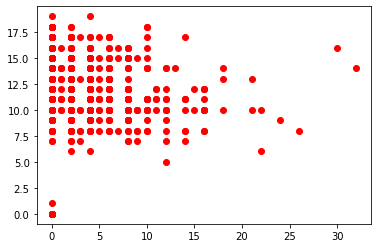

In [10]:
#let's see a scatterplot
plt.scatter(studentDf.absences,studentDf.G3,color='red')

In [19]:
##we need to create a mask to split the data in to 80% train, 20% test

msk = np.random.rand(len(studentDf)) < 0.8 #doing this assigns a "true or false" for each row 
train = studentDf[msk] #our training data will be all those "trues"
test = studentDf[~msk] #all the falses

Text(0, 0.5, 'final grade')

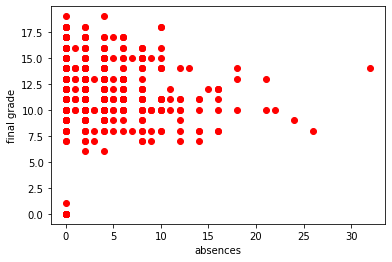

In [20]:
#now let's scatter plot the part of the data we selected as the training data! for engine size
plt.scatter(train.absences,train.G3,color='red')
plt.xlabel('absences')
plt.ylabel('final grade')

In [21]:
####let's make a linear regression model!
from sklearn import linear_model
regr = linear_model.LinearRegression() #makes the regression object
train_x = np.asanyarray(train[['absences']]) #makes the independent column into numpy array
train_y = np.asanyarray(train[['G3']]) #makes the dependent column into numpy array
regr.fit (train_x, train_y) #fits the data using the regr object

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.06104893]]
Intercept:  [12.14194329]


Text(0, 0.5, 'final grade')

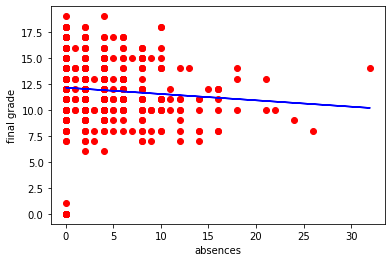

In [22]:
####PLOTTING THE FIT LINE OVER THE DATA
plt.scatter(train.absences, train.G3,  color='red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')
plt.xlabel('absences')
plt.ylabel('final grade')

In [25]:
####Evaluation using our test set 
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['absences']]) #make numpy arrays from out test set like we did for training
test_y = np.asanyarray(test[['G3']])
test_y_hat = regr.predict(test_x) #makes a list of predicted y's, or emissions, given x's

##some evaluation metrics:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))

##our R^2 result
print("R2-score: %.2f" % r2_score(test_y , test_y_hat) ) #how well predicted y's fall in with the tested y's

Mean absolute error: 2.46
Residual sum of squares (MSE): 11.45
R2-score: 0.01
